# Asteroid Diameter Prediction- PaAC
## Ayush Nikhade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
sns.set_theme(style="whitegrid")

In [2]:
# Some important terms used in this study are

# semi-major axis(a): semi major axis of ellipsoidal path of the asteroid
# eccentricity(e): ecentricity of the ellipse formed of the path of the aseteroid e^2=1-b^2/a^2
# Magnitude slope parameter(G):he slope parameter determines how strongly the apparent brightness of an asteroid depends on the phase angle 
# inclination(i):The inclination is the angle between the orbital plane of the asteroid and the plane of the ecliptic
# Longitude of the ascending node(om):The longitude of the ascending node (☊ or Ω) is one of the orbital elements used to specify the orbit of an object in space. It is the angle from a specified reference direction, called the origin of longitude, to the direction of the ascending node, as measured in a specified reference plane
# argument of perihelion(w):If we rotate the axis of the orbit around the focus, then the rotation angle is the argument of perihelion (ω)
# perihelion distance(q): The perihelion is the point in the orbit of a planet, asteroid or comet that is nearest to the sun
# aphelion distance(au)(ad):aphelion, the point in the orbit of a planet, comet, or other body most distant from the Sun.
# Orbital period(per_y): The orbital period (also revolution period) is the amount of time a given astronomical object takes to complete one orbit around another object
# data_arc: data arc-span(d): The time for which asteroid is visible in days
# condition code:Orbit condition code:?????????????????????????????????????????????????
# n_obs_used: number of observations used: ???????????????????????????????????????????????????
# Absolute Magnitude(H)An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle
# (diameter): Diameter of asteroid(Km)
# extent :Object bi/tri axial ellipsoid dimensions(Km):??????? not imp ig
# albedo Albedo is ratio of the light received by a body to the light reflected by that body. Albedo values range from 0 (pitch black) to 1 (perfect reflector).
# rot_per: Rotation Period(h): the time that the object takes to complete a single revolution around its axis of rotation relative to the background stars, measured in sidereal time
# (GM) Standard gravitational parameter, Product of mass and gravitational constant
# (BV) Color index B-V magnitude difference The color index of a star is the difference between the magnitude of the star in one filter and the magnitude of the same star in another filter. Any filters can be used for color indices, but some of the most common are B - V and V - R. B is blue wavelengths, V is green wavelengths and R is red wavelengths.
# (UB) Color index U-B magnitude difference 
# (IR) Color index I-R magnitude difference
# specs_B Spectral taxonomic type(SMASSII) : naming conventions of type 1
# specs_T Spectral taxonomic type(Tholen) : naming convention of type 2 read wikipedia for more
# neo - if it is a near earth object/asteroid
# pha- if it is a potentially hazardous asteroid
# moid(au) Minimum orbit intersection distance is defined as the distance between the closest points of the osculating orbits of two bodies
#asteroid orbit class : classification of type of asteroid basically
# mean motion (n): 
#orbital period (d)
#mean anomaly


## doubts:
# orbital period considered twice?
# meaning of ????????????? and is it even imp?

## Week-1: Performing EDA and removing null Values

In [3]:
#fetching the dataset
df=  pd.read_csv("Asteroid_Updated.csv")

# set the max columns to none
pd.set_option('display.max_columns', None)
df

C:\Users\Ayush\AppData\Local\Temp\ipykernel_17412\3853024891.py:2: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=  pd.read_csv("Asteroid_Updated.csv")


,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.340,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.130,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.330,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.200,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.850,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [4]:
df.info()
#many null values present will remove them later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [5]:
#checking for null value percentages
df.isnull().sum()/df.shape[0]*100

name              97.383990
a                  0.000238
e                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
q                  0.000000
ad                 0.000715
per_y              0.000119
data_arc           1.842770
condition_code     0.103249
n_obs_used         0.000000
H                  0.320228
neo                0.000715
pha                1.958048
diameter          83.609181
extent            99.997856
albedo            83.755302
rot_per           97.761619
GM                99.998333
BV                99.878411
UB                99.883413
IR                99.999881
spec_B            99.801599
spec_T            99.883294
G                 99.985829
moid               1.958048
class              0.000000
n                  0.000238
per                0.000715
ma                 0.000953
dtype: float64

In [6]:
#dropping all the features which have more than 90%null values
for i in df.columns:
    if(df[i].isnull().sum()/df[i].shape>=0.9):
        df=df.drop([i],axis=1)

#we cant remove diameter as we need to predict that value, so we remove the instances that have null value in diameter and albedo as both are missing in almost same instances
df=df.dropna(subset=['diameter'],axis=0)
df=df.dropna(subset=['albedo'],axis=0)

df.shape

(136406, 21)

In [7]:
#checking for null value percentages
df.isnull().sum()/df.shape[0]*100
#we will fill the missing values in data_arc and H after observing for some correlation

a                 0.000000
e                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
q                 0.000000
ad                0.000000
per_y             0.000000
data_arc          0.094571
condition_code    0.000000
n_obs_used        0.000000
H                 0.200138
neo               0.000000
pha               0.000000
diameter          0.000000
albedo            0.000000
moid              0.000000
class             0.000000
n                 0.000000
per               0.000000
ma                0.000000
dtype: float64

In [8]:
df.describe(include="all")

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
count,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136277.000000,136406.0,136406.000000,136133.000000,136406,136406,136406.000,136406.000000,136406.000000,136406,136406.000000,1.364060e+05,136406.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,2,2,24447.000,NaN,NaN,11,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,N,N,3.296,NaN,NaN,MBA,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125683.0,NaN,NaN,135605,136208,44.000,NaN,NaN,125306,NaN,NaN,NaN
mean,2.815399,0.145411,10.306276,169.817261,181.851072,2.403404,3.227395,4.887253,9020.285331,NaN,680.186238,15.169312,NaN,NaN,NaN,0.130066,1.420768,NaN,0.219494,1.785069e+03,183.052572
std,1.528982,0.077271,6.810129,102.723475,103.555966,0.516486,2.908873,25.647204,6159.691841,NaN,595.567214,1.404982,NaN,NaN,NaN,0.109994,0.512744,NaN,0.056285,9.367641e+03,103.377065
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,NaN,5.000000,3.200000,NaN,NaN,NaN,0.001000,0.000166,NaN,0.000128,1.810067e+02,0.000517
25%,2.537308,0.089684,5.095530,82.275599,91.878824,2.069258,2.865167,4.041737,6313.000000,NaN,220.000000,14.400000,NaN,NaN,NaN,0.053000,1.082772,NaN,0.181240,1.476245e+03,94.306367
50%,2.750811,0.138564,9.350592,160.489994,183.572070,2.364039,3.167376,4.562464,7591.000000,NaN,503.000000,15.300000,NaN,NaN,NaN,0.078000,1.384910,NaN,0.216029,1.666440e+03,186.758737
75%,3.092435,0.191081,13.688269,256.240144,271.673944,2.685933,3.467919,5.438248,9768.000000,NaN,990.000000,16.100000,NaN,NaN,NaN,0.188000,1.699593,NaN,0.243862,1.986320e+03,271.386721


In [9]:
df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
count,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136406.000000,136277.000000,136406.000000,136133.000000,136406.000000,136406.000000,136406.000000,1.364060e+05,136406.000000
mean,2.815399,0.145411,10.306276,169.817261,181.851072,2.403404,3.227395,4.887253,9020.285331,680.186238,15.169312,0.130066,1.420768,0.219494,1.785069e+03,183.052572
std,1.528982,0.077271,6.810129,102.723475,103.555966,0.516486,2.908873,25.647204,6159.691841,595.567214,1.404982,0.109994,0.512744,0.056285,9.367641e+03,103.377065
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.537308,0.089684,5.095530,82.275599,91.878824,2.069258,2.865167,4.041737,6313.000000,220.000000,14.400000,0.053000,1.082772,0.181240,1.476245e+03,94.306367
50%,2.750811,0.138564,9.350592,160.489994,183.572070,2.364039,3.167376,4.562464,7591.000000,503.000000,15.300000,0.078000,1.384910,0.216029,1.666440e+03,186.758737
75%,3.092435,0.191081,13.688269,256.240144,271.673944,2.685933,3.467919,5.438248,9768.000000,990.000000,16.100000,0.188000,1.699593,0.243862,1.986320e+03,271.386721
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,27.500000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [10]:
df['condition_code'].unique()
#it can be converted into int type

array([0, 1, 3, 2, '0', '1', '2', '4', '5', '9', '3', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [11]:
df['diameter'].unique()
#it can be converted to float type


array(['939.4', '545', '246.596', ..., 0.122, 0.651, 1.077], dtype=object)

In [12]:
df["diameter"] = df["diameter"].astype(float)
df["condition_code"] = df["condition_code"].astype(int)
print(df['condition_code'].unique())
print(df['diameter'].unique())


[0 1 3 2 4 5 9 7 6 8]
[9.39400e+02 5.45000e+02 2.46596e+02 ... 1.22000e-01 6.51000e-01
 1.07700e+00]


In [13]:
df.info()
#we divide dataset into numerical and categorical variables
df_cat=df[['neo','pha','class']]
df_num=df.drop(['neo','pha','class'],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136406 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               136406 non-null  float64
 1   e               136406 non-null  float64
 2   i               136406 non-null  float64
 3   om              136406 non-null  float64
 4   w               136406 non-null  float64
 5   q               136406 non-null  float64
 6   ad              136406 non-null  float64
 7   per_y           136406 non-null  float64
 8   data_arc        136277 non-null  float64
 9   condition_code  136406 non-null  int32  
 10  n_obs_used      136406 non-null  int64  
 11  H               136133 non-null  float64
 12  neo             136406 non-null  object 
 13  pha             136406 non-null  object 
 14  diameter        136406 non-null  float64
 15  albedo          136406 non-null  float64
 16  moid            136406 non-null  float64
 17  class     

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'e'}>,
        <AxesSubplot:title={'center':'i'}>,
        <AxesSubplot:title={'center':'om'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'q'}>,
        <AxesSubplot:title={'center':'ad'}>,
        <AxesSubplot:title={'center':'per_y'}>],
       [<AxesSubplot:title={'center':'data_arc'}>,
        <AxesSubplot:title={'center':'condition_code'}>,
        <AxesSubplot:title={'center':'n_obs_used'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'albedo'}>,
        <AxesSubplot:title={'center':'moid'}>,
        <AxesSubplot:title={'center':'n'}>],
       [<AxesSubplot:title={'center':'per'}>,
        <AxesSubplot:title={'center':'ma'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

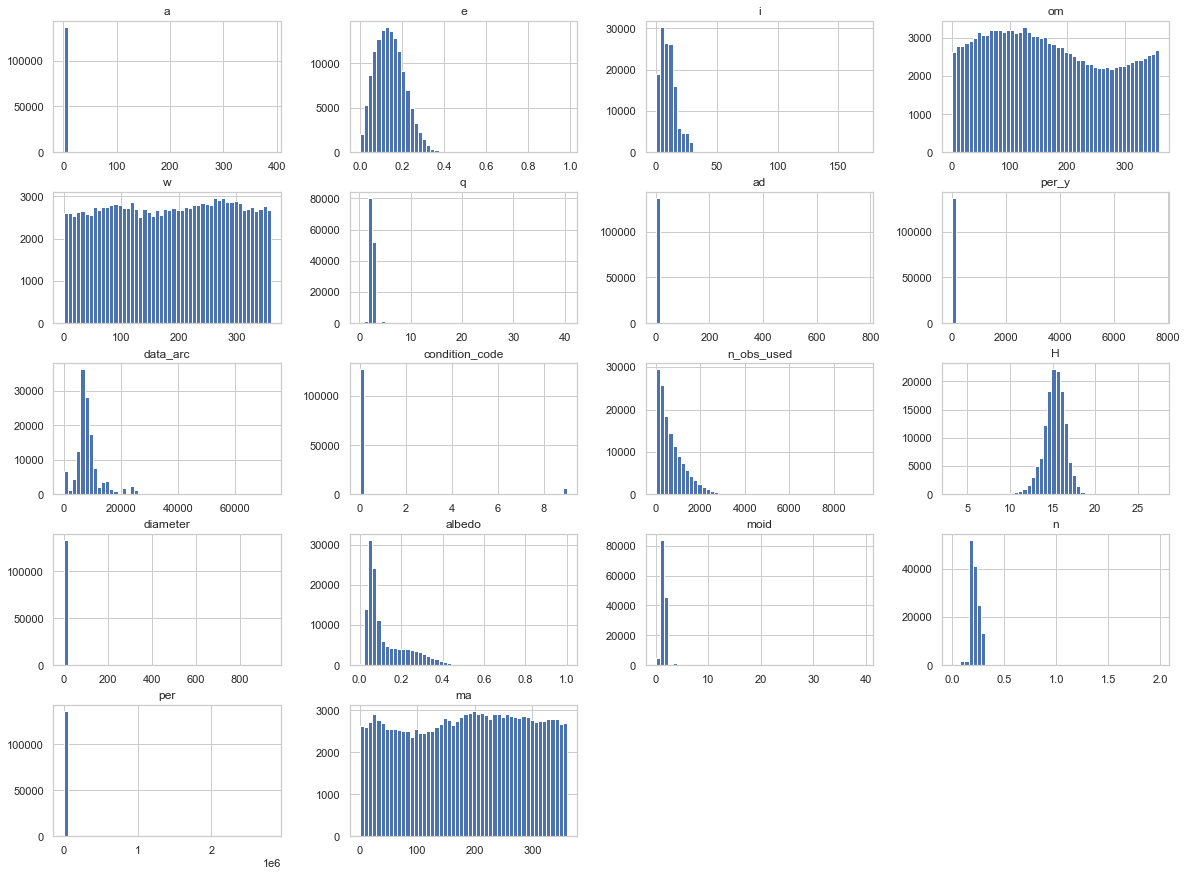

In [14]:
# Now Plotting every histograms for every numerical value of df
df_num.hist(bins=50, figsize=(20,15))
# a,ad,per_y,condition_code,diameter,moid,per has somem outliers
# e,H has gausian distribution
# i,q,data_arc has outliers and has a fairly normal distribution
# om,w,ma  has no outliers
# albedo, n have skewed data

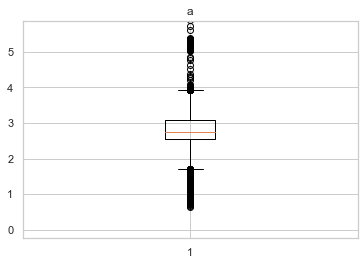

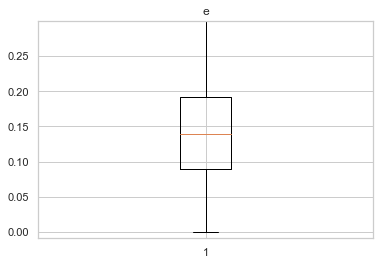

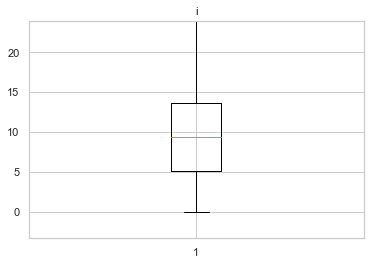

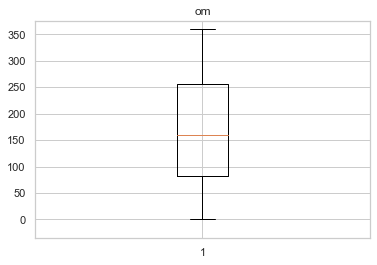

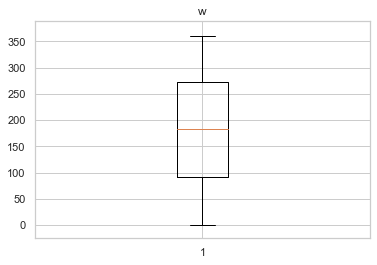

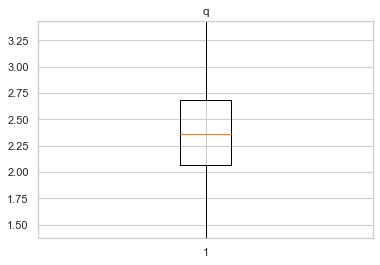

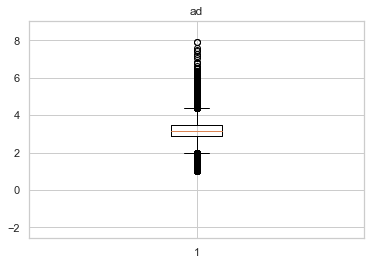

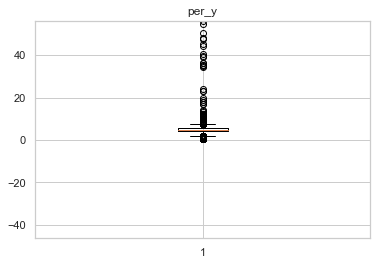

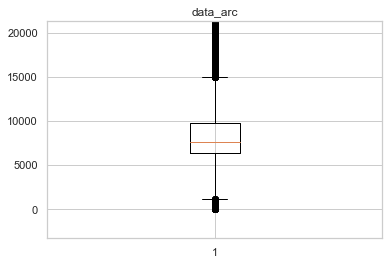

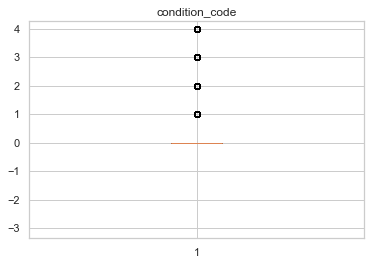

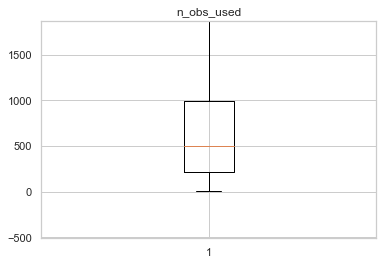

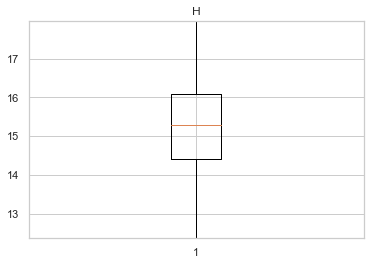

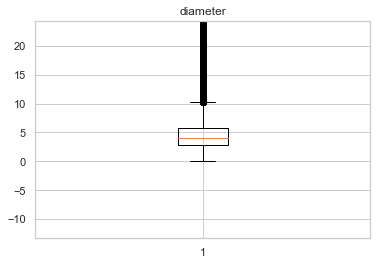

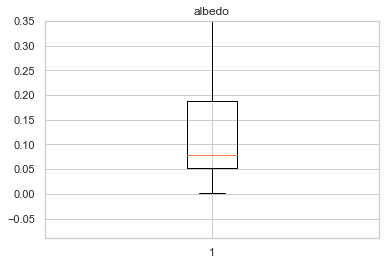

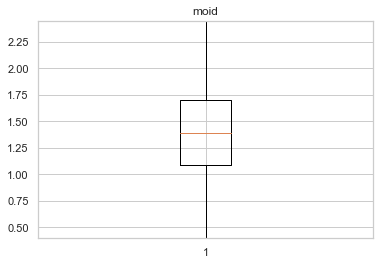

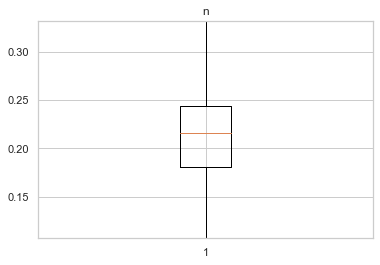

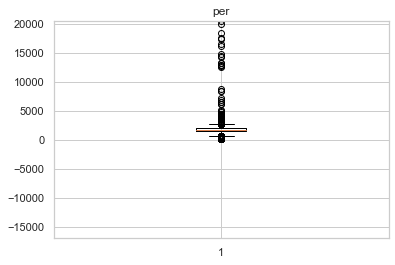

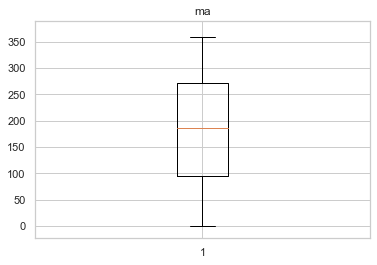

In [15]:
# checking boxplot for non null values of every feature for distribution and outliers for numerical variables
for i in df_num.columns:
    
    lowerLim=df_num[i].dropna().mean()-2*df_num[i].dropna().std()
    upperLim=df_num[i].dropna().mean()+2*df_num[i].dropna().std()
#     lowerLim=df_num[i].dropna().quantile(0.99)
#     upperLim=df_num[i].dropna().quantile(0.01)
    ax=plt.boxplot(x=df_num[i].dropna())
    plt.title(i)
    plt.ylim(lowerLim,upperLim)
    plt.show()

# A lot of outliers!!!

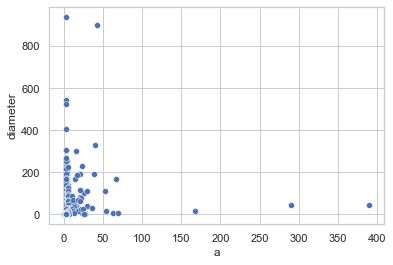

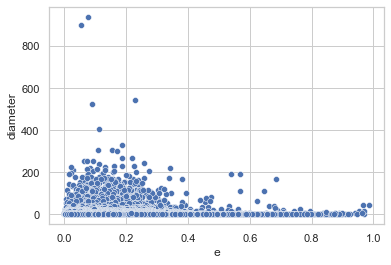

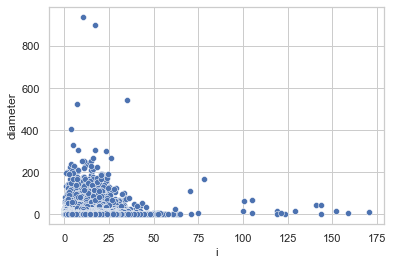

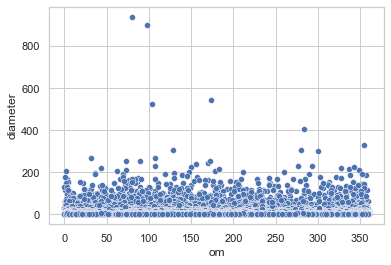

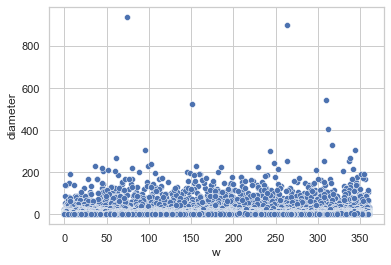

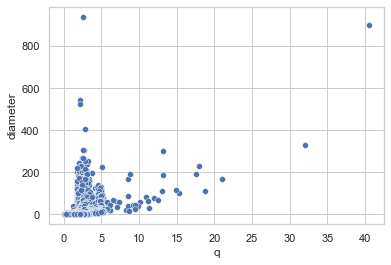

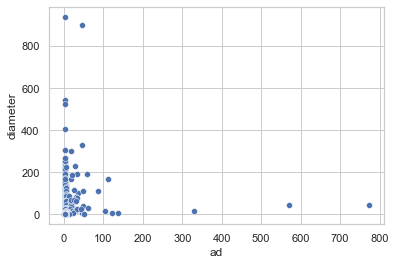

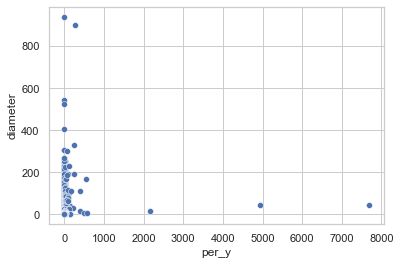

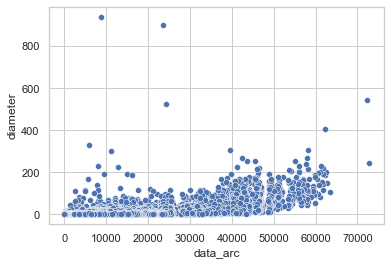

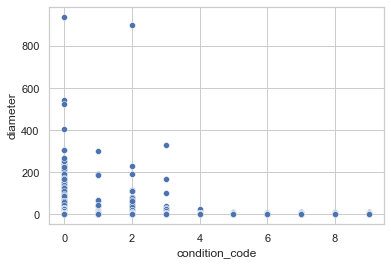

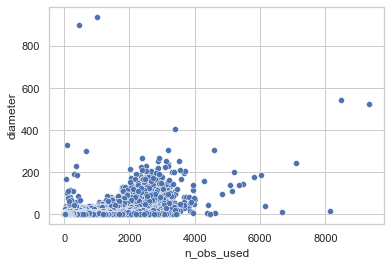

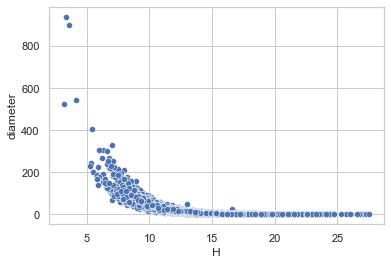

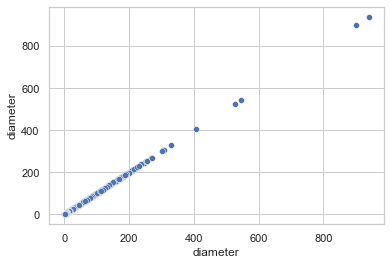

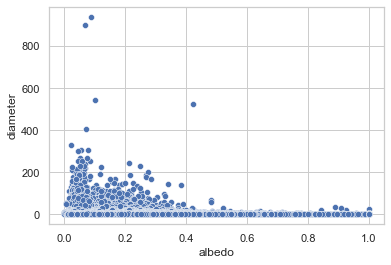

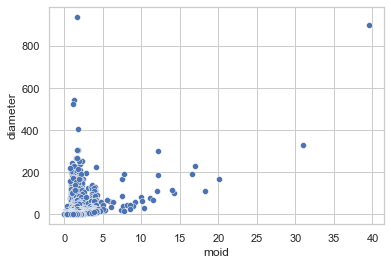

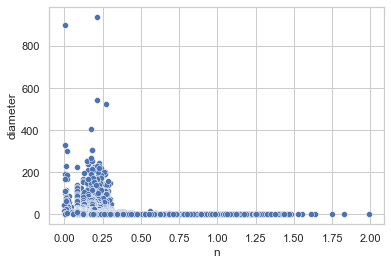

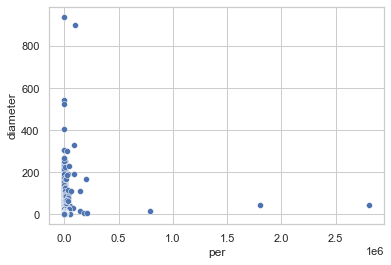

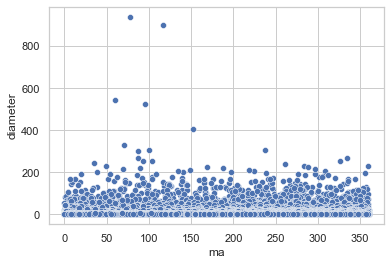

In [16]:
#Drawing a scatterplot for all features against diameter
for i in df_num.columns:
    sns.scatterplot(data=df_num,x=i,y='diameter')
    plt.show()

<AxesSubplot:>

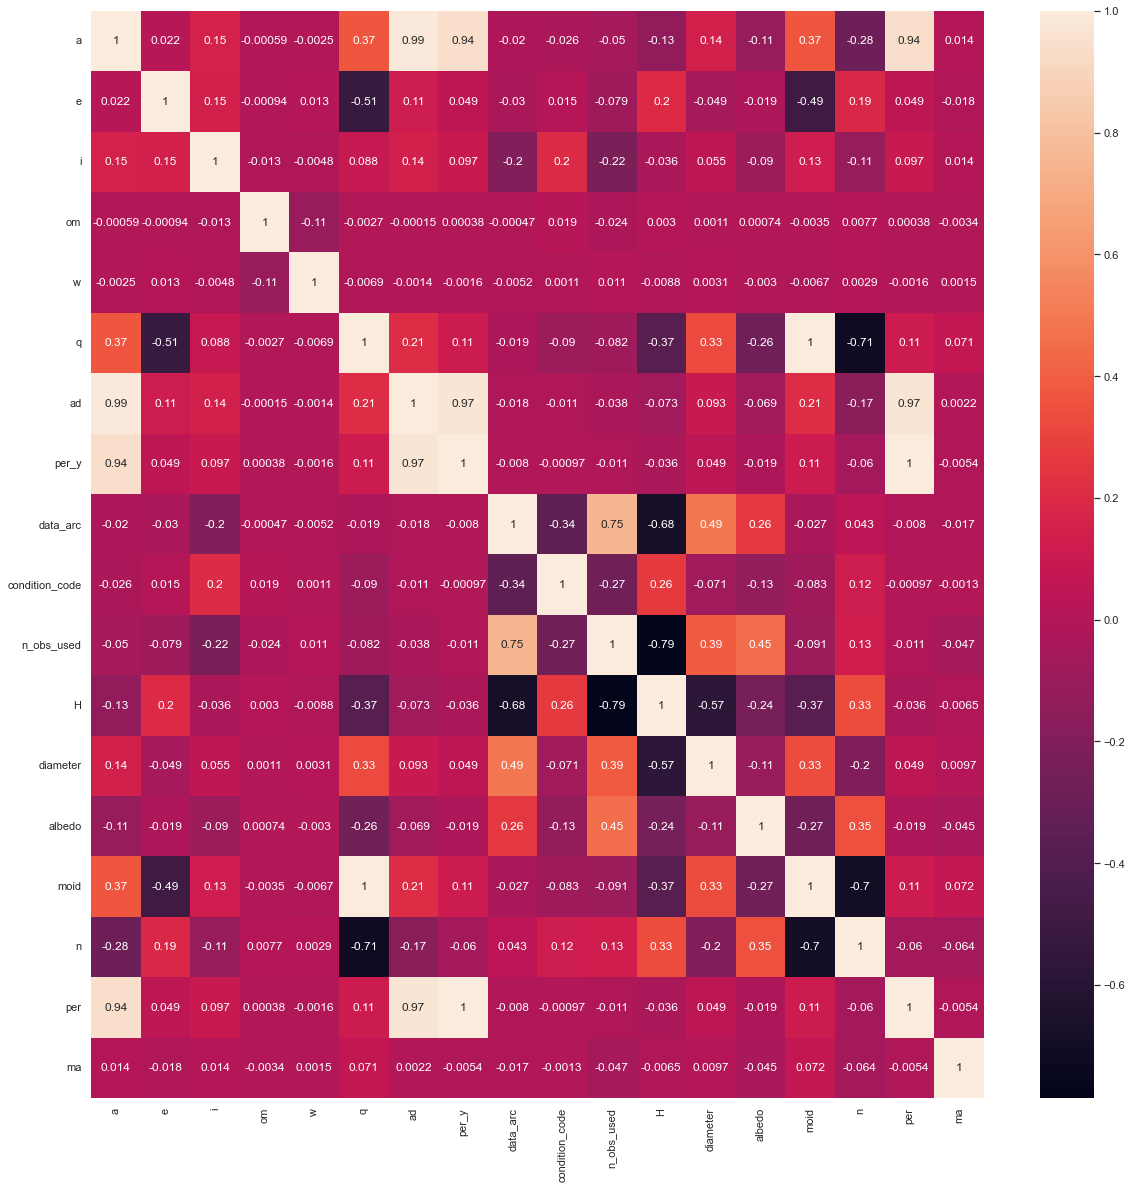

In [17]:
# heatmap for numerical variables
plt.figure(figsize=(20,20))
cor_matrix = df_num.corr()
cor_matrix.isnull().sum()
sns.heatmap(cor_matrix,annot=True)

#Some Interesting correlations
#per_y vs per have && q vs moid 1 for correlations, therefore they are repeated columns
#a vs ad have 0.99 correlation
#a vs per have 0.97 correlation
#per_y vs ad have 0.97 corelation
#per_y vs a has 0.94 correlation
#n_obs_used vs H 0.79 correlation
#n_obs_used vs data_arc 0.75 correlation

In [18]:
# Filling the null values in data_arc and H in relation to n_obs_used as it has high correlation
temp_mean1=df["data_arc"].mean()
temp_mean2=df["H"].mean()
temp_mean3=df["n_obs_used"].mean()

df['data_arc'] = df.apply(
    lambda row: row['n_obs_used']*temp_mean1/temp_mean3 if np.isnan(row['data_arc']) else row['data_arc'],
    axis=1
)
df['H'] = df.apply(
    lambda row: row['n_obs_used']*temp_mean2/temp_mean3 if np.isnan(row['H']) else row['H'],
    axis=1
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136406 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               136406 non-null  float64
 1   e               136406 non-null  float64
 2   i               136406 non-null  float64
 3   om              136406 non-null  float64
 4   w               136406 non-null  float64
 5   q               136406 non-null  float64
 6   ad              136406 non-null  float64
 7   per_y           136406 non-null  float64
 8   data_arc        136406 non-null  float64
 9   condition_code  136406 non-null  int32  
 10  n_obs_used      136406 non-null  int64  
 11  H               136406 non-null  float64
 12  neo             136406 non-null  object 
 13  pha             136406 non-null  object 
 14  diameter        136406 non-null  float64
 15  albedo          136406 non-null  float64
 16  moid            136406 non-null  float64
 17  class     

In [19]:
#dropping per as per and per_y are same values also q and moid
df=df.drop(['per','moid'],axis=1)
df_num=df_num.drop(['per','moid'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


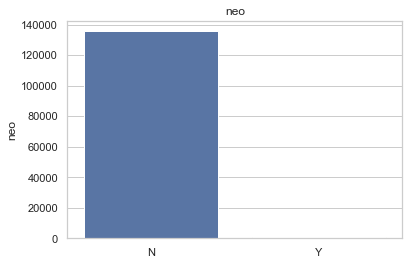

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


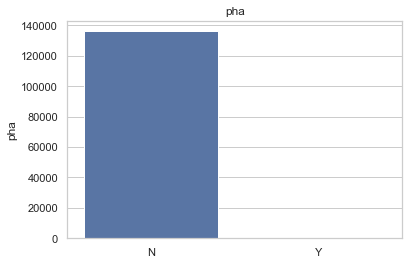

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


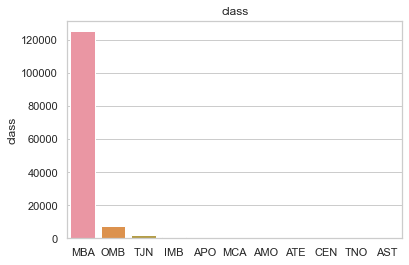

In [20]:
#for categorical variables
for i in df_cat:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

In [21]:
df_cat['neo'].value_counts()

N    135605
Y       801
Name: neo, dtype: int64

In [22]:
df_cat['pha'].value_counts()

N    136208
Y       198
Name: pha, dtype: int64

Week 1 sumbission:<br>
Learned basics of asteroid diameter prediction <br>
Studied the various terminologies used as features and its importance<br>
Performed EDA on the dataset and removed null values<br>
Found out about numerical corelations of numerical variables with each other<br>
Found out distribution of categorical variables<br>




## Week-2: Feature engineering


In [23]:
# converting neo and pha to numerical variables using one hot encoding as they only have 2 unique values 
df = pd.get_dummies(df, columns = ['neo', 'pha'])


In [24]:
# dropping one of each of dummy variables coulmn for both neo and pha 
df=df.drop(['neo_Y','pha_Y'],axis=1)

In [25]:
# however the same cannot be done for class as it has 20 unique values and would increase the number of features a lot 
# so we will use label encoding for class
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['class']= label_encoder.fit_transform(df['class'])
df['class'].unique()



## Doubt: How did we actually find corealation between class other features, as there may be more than one correalation as sometimes e(negative correlation) is used to classify and sometimes a(positive correlation) is used sometimes q(positive correalation) is used

array([ 6,  8,  7,  0,  5,  9,  4,  1,  3,  2, 10])

In [26]:
#eliminating features with correlations > 0.9
# a, per_y, ad have high corelation with each other so we eliminate a and per_y
df=df.drop(['a','per_y'],axis=1)
df

,e,i,om,w,q,ad,data_arc,condition_code,n_obs_used,H,diameter,albedo,class,n,ma,neo_N,pha_N
0,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,0,1002,3.34,939.400,0.0900,6,0.213885,77.372096,1,1
1,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,0,8490,4.13,545.000,0.1010,6,0.213503,59.699133,1,1
2,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,0,7104,5.33,246.596,0.2140,6,0.226019,34.925016,1,1
3,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,0,9325,3.20,525.400,0.4228,6,0.271609,95.861936,1,1
4,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,0,2916,6.85,106.699,0.2740,6,0.238632,282.366289,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,2250.0,2,47,18.20,1.077,0.1160,6,0.175794,195.737632,1,1
797860,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,2373.0,1,50,16.20,3.793,0.0210,6,0.174527,164.999439,1,1
798077,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,3297.0,2,33,17.30,2.696,0.0610,6,0.242270,145.319581,1,1
799752,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,2208.0,2,27,17.20,3.271,0.0720,6,0.184914,175.708508,1,1


In [27]:
#dealing with outliers

#!!!there are many many outliers, so we cannot simply delete them, what we will do is train 2 models one with features haivng 
    #these outliers and once without these features and compare which model works better!!!

# a is the distance and can be of any value even large values as asteroids are also found in OORT clouds
#e is eccentricity of conic and can be in range 0 to 1 and all values are natural in our dataset
# i is angle ans is between 0 to 180 degree which is also natural
# om and w also angles between range of 0 to 360 which is natural
# q and ad are distances and can haave any value ,  q must be less than or equal to ad so we can check for that
idx = df[ (df['ad'] < df['q'])].index
idx
# no such data entry exists therefore q and ad also all natural outliers

# changed this part*************************************************
# # # per_y is time in years for revolution of asteroid about sun and most values are in valid range, highest is 7400years which 
# #     # is larger than largest time period of 1000 years so trimming all outliers of values above 1000 for per_y(google search)
# # idx=df[df['per_y']>1000].index
# # idx
# # df.drop(idx , inplace=True)
# ******************************************************************

# condition_code is categorical and has 8 categories so, outliers may be natural themselves
# H is distance and has a valid range
# albedo is a ratio and ranges from 0 to 1 and all values for albedo lie within this range so natural outliers
# moid is also distance and has a valid range
# class is categorical and has 8 categories so, outliers may be natural themselves
   

Int64Index([], dtype='int64')

In [28]:
data_arc_sq=np.power(df['data_arc'],2)
df['data_arc_sq']=data_arc_sq

In [29]:
# Assigning dependant and independent variables ************ not used further
X=df.drop(['diameter'],axis=1)
Y=df['diameter']

In [30]:
# Creating Xoutlier and Youtlier for the running of model without outliers ************ not used further
dframe=df.copy()
for i in dframe.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    new_dframe = dframe[(dframe[i] < upper_limit)&(dframe[i] > lower_limit)]
new_dframe.shape

(117531, 18)

In [31]:
Xoutliers=new_dframe.drop(['diameter'],axis=1)
Youtliers=new_dframe['diameter']
# ************************************************************ not used further

In [32]:
#using StandardScaler for scaling numerical values as we have lot of outliers because using minmax scaling will 
    #crush our values to very small numbers as we have outliers********************************* not used further
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xTrain_std = scaler.fit_transform(X)
xOutliersTrain_std=scaler.fit_transform(Xoutliers)

In [33]:
# # splitting the dataset into train and test using stratified split *********************************** not used further
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
# sss.get_n_splits(xTrain_std, Y)
# sss.get_n_splits(xOutliersTrain_std, Youtliers)

Week 2 submission:<br>
Converted categorical variables to numerical variables<br>
Dropped features having high corelations with each other<br>
Modified few features like data_arc_sq and d using preexisting formula from https://cneos.jpl.nasa.gov/tools/ast_size_est.html <br>
Dealt with outliers by deciding to train 2 models as outliers are in huge quantity<br>
Scaled data using standard scaler as it improves performance of most algos<br>
Used stratified split to split data into test and train<br>


## Week 3: Training and Tuning Hyperparameters for outliers case

In [34]:
df['diameter_grp'] = pd.cut(df['diameter'],bins=[0., 4., 8., 18.,50., np.inf],labels=[1, 2, 3, 4, 5])
# diameter values 0-4 in grp 1, 4-8 in grp 2, etc.                               
# name of groups  X["diameter_grp"].hist()
# shows the number of samples in each diameter group
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(test_size=0.2, random_state=1)
# Lets go with a smaller test size as we have a lot of data

for train_index, test_index in split.split(df, df['diameter_grp']):
    X_train = df.iloc[train_index]
    X_test =  df.iloc[test_index]

# Creating a target Dataset
Y_train = X_train.pop('diameter')
Y_test = X_test.pop('diameter')
X_train.head()

,e,i,om,w,q,ad,data_arc,condition_code,n_obs_used,H,albedo,class,n,ma,neo_N,pha_N,data_arc_sq,diameter_grp
131031,0.154649,7.651491,27.428798,29.838843,2.176795,2.973242,7248.0,0,481,16.0,0.067,6,0.238525,183.076842,1,1,52533504.0,1
85458,0.222729,3.276298,23.684296,296.259201,1.784399,2.807047,8267.0,0,910,15.5,0.153,6,0.283351,42.677466,1,1,68343289.0,1
242507,0.057108,17.845315,107.944032,184.291471,2.943811,3.300408,5871.0,0,235,15.3,0.033,6,0.178662,16.098207,1,1,34468641.0,2
418715,0.168423,16.487215,58.305554,71.497107,2.578597,3.623107,4100.0,0,172,15.9,0.152,6,0.180502,260.297214,1,1,16810000.0,1
161546,0.122190,12.881125,257.612976,237.712468,2.332898,2.982370,6730.0,0,410,15.4,0.228,6,0.227489,61.845590,1,1,45292900.0,1


In [35]:
#using StandardScaler for scaling numerical values as we have lot of outliers because using minmax scaling will 
    #crush our values to very small numbers as we have outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Train_std = scaler.fit_transform(X_train)
X_Test_std=scaler.fit_transform(X_test)


### Linear Regression stochastic gradiant descent
Mae and r2 score are 5.80903458897405e+21 and -7.252051292180751e+19

In [36]:
# Using Linear Regressor
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(penalty=None, eta0=0.1) 
sgd_reg.fit(X_Train_std, Y_train)
Y_Pred=sgd_reg.predict(X_Test_std)
# sgd_reg.fit(X_train, Y_train)
# Y_Pred=sgd_reg.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))

6.309283199804371e+21
-7.876566179984918e+19


### Linear Regression with Regularisation using ElasticNet
Mae and r2 score are 31.52823700426082 and 0.6063986392146579

In [37]:
# Using Regularised Linear Regressor

from sklearn.linear_model import ElasticNet 
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(X_Train_std, Y_train)
Y_Pred=elastic_net.predict(X_Test_std)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))


31.52823700426082
0.6063986392146579


### Tuning Hyperparameters for elastic nets using grid search cv
we get best parameters as {'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': 30}

In [38]:

from sklearn.model_selection import GridSearchCV

parametersGrid = {"max_iter": [10, 20, 30],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='r2', cv=10)
grid.fit(X_Train_std, Y_train)
grid.best_params_


# from sklearn.linear_model import RidgeCV
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100]).fit(X_Train_std, Y_train)
# clf.score(X_Train_std, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e+06, tolerance: 8.916e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.930e+06, tolerance: 9.119e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+06, tolerance: 8.082e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.652e+06, tolerance: 8.168e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+06, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.930e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.957e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.821e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+06, tolerance: 9.248e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.785e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.847e+06, tolerance: 9.248e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.813e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+06, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.725e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.506e+06, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.977e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.841e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.818e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.795e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.792e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+06, tolerance: 9.119e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.822e+06, tolerance: 9.000e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+06, tolerance: 8.082e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.644e+06, tolerance: 8.168e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.791e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.845e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+06, tolerance: 9.248e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.815e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+06, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.760e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.838e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.827e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.906e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.929e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.800e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.806e+06, tolerance: 9.248e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.361e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.772e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+06, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.642e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.852e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.805e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.004e+06, tolerance: 9.210e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.886e+06, tolerance: 9.035e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.950e+06, tolerance: 9.319e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+06, tolerance: 8.916e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.865e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.981e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.555e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.774e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.584e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.688e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.685e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.794e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.750e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.743e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.775e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+06, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.734e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.954e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+06, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.808e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.921e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+06, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+06, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.249e+06, tolerance: 9.119e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.237e+06, tolerance: 9.000e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.998e+06, tolerance: 8.168e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.307e+06, tolerance: 9.319e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.434e+03, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+03, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.550e+03, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.292e+04, tolerance: 8.082e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+04, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.938e+04, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.656e+04, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.801e+04, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.769e+04, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+06, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+06, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.555e+04, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+06, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+06, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+06, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+06, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.355e+06, tolerance: 9.119e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+06, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.436e+03, tolerance: 9.035e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.790e+03, tolerance: 9.227e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.044e+03, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+05, tolerance: 8.168e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.641e+05, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+04, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.730e+05, tolerance: 9.000e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.886e+05, tolerance: 9.210e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.607e+05, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.877e+06, tolerance: 9.035e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+06, tolerance: 9.227e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.892e+06, tolerance: 8.916e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.949e+06, tolerance: 9.119e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.607e+03, tolerance: 9.319e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+03, tolerance: 8.916e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.661e+03, toleranc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+06, tolerance: 8.168e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.141e+06, tolerance: 9.319e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.099e+06, tolerance: 9.227e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.113e+06, tolerance: 9.248e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.493e+06, tolerance: 9.119e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.435e+06, tolerance: 9.000e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.977e+06, tolerance: 8.082e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.022e+06, tolerance: 8.168e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

{'alpha': 0.001, 'l1_ratio': 0.0, 'max_iter': 30}

### Elastic Net after tuning gives best mae and r2 score as 29.024053290245607 and 0.6376610950684272

In [39]:
#best Elastic net using alpha=0.001, l1ratio=0.0, max_iter=30
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.0, max_iter=30) 
elastic_net.fit(X_Train_std, Y_train)
Y_Pred=elastic_net.predict(X_Test_std)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))

29.024053290245607
0.6376610950684272


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.952e+06, tolerance: 9.925e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Random Forest Regressor
Mae and r2 score are 20.611432613999273 and 0.7426850120573147

In [40]:
# Using Random Forest Regresssor

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_Train_std, Y_train)
Y_Pred=regr.predict(X_Test_std)
# regr.fit(X_train, Y_train)
# Y_Pred=regr.predict(X_test)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))

20.611432613999273
0.7426850120573147


### Tuning Random Forest Regressor using Grid search cv
best hyperparameters are {'max_features': 8, 'n_estimators': 30}

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
               {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ] 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_Train_std,Y_train)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

### Using best features in Random Forest Regressor we get best mae and best r2 score as 3.1953892456823816 and 0.9601084718067343

In [42]:
# Using Random Forest Regresssor

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_features=8,n_estimators=30, random_state=0)
regr.fit(X_Train_std, Y_train)
Y_Pred=regr.predict(X_Test_std)
# regr.fit(X_train, Y_train)
# Y_Pred=regr.predict(X_test)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))

3.1953892456823816
0.9601084718067343


In [43]:
# from sklearn.svm import SVR
# svregr=SVR(C=1.0, epsilon=0.2)
# svregr.fit(X_Train_std, Y_train)
# Y_pred=svregr.predict(X_Test_std)

# print(mean_squared_error(Y_test, Y_Pred))
# print(r2_score(Y_test, Y_Pred))

## taking too long to train data so skipping SVR

### Gradient Boosting Regressor
mae and r2 score are 10.820233707870571 and 0.8649192242859083

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 42)
gbr = GradientBoostingRegressor()
gbr.fit(X_Train_std, Y_train)
Y_Pred = gbr.predict(X_Test_std)


print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))

2.169092148084738
0.9729208575462188


best params after grid searchcv for gradiant boosting are {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.5}

In [1]:
# # parameters = {
# #     "loss":["deviance"],
# #     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
# #     "max_depth":[1,3,5,8],
# #     "max_features":["log2","sqrt"],
# #     "n_estimators":[10,100,200,400]
# #     }
# parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
#                   'subsample'    : [0.9, 0.5, 0.2, 0.1],
#                   'n_estimators' : [10,100,200,400],
#                   'max_depth'    : [1,4,6,8]
#                  }
# #passing the scoring function in the GridSearchCV
# clf = GridSearchCV(GradientBoostingRegressor(),param_grid= parameters,refit=False,cv=2, n_jobs=-1)

# clf.fit(X_Train_std, Y_train)
# clf.best_params_

####Takes over 2 Hours for actual results so couldnt run it again

### Using tuned gradient boosting regressor we get 

Mae and r2 score are  2.058823451473698 and 0.9742974619225518


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, random_state = 42,learning_rate=0.03,subsample=0.5)
gbr.fit(X_Train_std, Y_train)
Y_Pred = gbr.predict(X_Test_std)


print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test, Y_Pred))


2.058823451473698
0.9742974619225518


### Using bagging regressor we get mae and r2 score as 2.1014297966226723 and 0.9737655604582721



In [47]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100, random_state=0,max_samples=0.8,verbose=1)
regr.fit(X_Train_std, Y_train)
Y_Pred= regr.predict(X_Test_std)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test,Y_Pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2.1014297966226723
0.9737655604582721


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


Week 3 Submission <br>
### Best Results
I am getting  results r2 score for Tuned GradientBoosting Regressor which is <strong>0.9742974619225518</strong> and mae is <strong>2.058823451473698
</strong>


## Week 4: Neural Networks basic


In [48]:
from sklearn.neural_network import MLPRegressor

mlp=  MLPRegressor(random_state=1, max_iter=5000)
mlp.fit(X_Train_std, Y_train)
Y_Pred= mlp.predict(X_Test_std)

print(mean_squared_error(Y_test, Y_Pred))
print(r2_score(Y_test,Y_Pred))


3.242105595528456
0.9595252606722883


In [51]:
import tensorflow as tf

from tensorflow import keras
from keras import layers

from keras.layers import Dense
from keras.layers import Dropout

In [54]:
model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[18]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(1)
])
    

    
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.MeanSquaredError()]
)
model.fit(X_Train_std, Y_train, epochs=100)

Epoch 1/100
3411/3411 [==============================] - 5s 1ms/step - loss: 26.7945 - mean_squared_error: 26.7945
Epoch 2/100
3411/3411 [==============================] - 4s 1ms/step - loss: 17.7184 - mean_squared_error: 17.7184
Epoch 3/100
3411/3411 [==============================] - 4s 1ms/step - loss: 14.9212 - mean_squared_error: 14.9212
Epoch 4/100
3411/3411 [==============================] - 5s 1ms/step - loss: 13.4470 - mean_squared_error: 13.4470
Epoch 5/100
3411/3411 [==============================] - 5s 1ms/step - loss: 11.5713 - mean_squared_error: 11.5713
Epoch 6/100
3411/3411 [==============================] - 4s 1ms/step - loss: 9.7324 - mean_squared_error: 9.7324
Epoch 7/100
3411/3411 [==============================] - 4s 1ms/step - loss: 9.0919 - mean_squared_error: 9.0919
Epoch 8/100
3411/3411 [==============================] - 4s 1ms/step - loss: 8.3435 - mean_squared_error: 8.3435
Epoch 9/100
3411/3411 [==============================] - 4s 1ms/step - loss: 5.5954 - 

In [55]:
Y_predicted = model.predict(X_test)
r2 = r2_score(Y_predicted, Y_test)
print(r2)

853/853 [==============================] - 1s 935us/step
-0.2595053042461051
